In [21]:
# import libraries
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re

from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# load in directories
from experiment_code.constants import Defaults

In [22]:
# load in data from gorilla
df = pd.read_csv(os.path.join(Defaults.RAW_DIR, "gorilla_v2.csv"))


In [23]:
# filter dataframe to remove redundant cols
df_filtered = df.filter({'Experiment ID', 'Experiment Version', 'Task Version', 'Participant Private ID',
           'counterbalance-mpke', 'Spreadsheet Row', 'Zone Type', 
           'Reaction Time', 'Response', 'display', 'iti_dur_ms', 
           'trial_dur_ms', 'V1', 'V2', 'V2', 'V3', 'V4', 'V5',
          'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12'})

In [24]:
# clean spreadsheet
df_filtered = df_filtered.rename({'Zone Type':'Zone_Type'}, axis=1)
df_filtered = df_filtered.rename({'Participant Private ID':'Participant_Private_ID'}, axis=1)
df_filtered.columns

Index(['V9', 'Reaction Time', 'Experiment ID', 'V5', 'V3', 'trial_dur_ms',
       'Experiment Version', 'Zone_Type', 'V7', 'V2', 'V8', 'iti_dur_ms',
       'display', 'Response', 'V4', 'V11', 'V10', 'Task Version',
       'Participant_Private_ID', 'Spreadsheet Row', 'V12',
       'counterbalance-mpke', 'V6', 'V1'],
      dtype='object')

In [25]:
# select response-only rows and re-index
df_filtered = df_filtered.query('Zone_Type=="response_rating_scale_likert"')
df_filtered = df_filtered.reset_index()
del df_filtered['index']

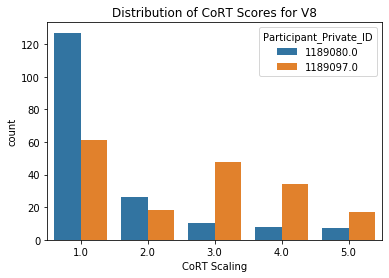

In [26]:
#Investigate Outlier in V8
df_filtered_V8 = df_filtered.loc[df_filtered['counterbalance-mpke'] == "V8"]
df_filtered_V8.Participant_Private_ID.unique()

sns.countplot(x='Response', hue='Participant_Private_ID', data= df_filtered_V8)
plt.xlabel('CoRT Scaling')
plt.title('Distribution of CoRT Scores for V8');

In [27]:
#Drop Outlier in V8
df_where_outlier = df_filtered[df_filtered.Participant_Private_ID == 1189080.0]
print(df_where_outlier.index)
df_filtered = df_filtered.drop(df_filtered.index[0:178])
df_filtered

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            168, 169, 170, 171, 172, 173, 174, 175, 176, 177],
           dtype='int64', length=178)


,V9,Reaction Time,Experiment ID,V5,V3,trial_dur_ms,Experiment Version,Zone_Type,V7,V2,...,V4,V11,V10,Task Version,Participant_Private_ID,Spreadsheet Row,V12,counterbalance-mpke,V6,V1
178,Some of the kids thought the professor wasn't ...,9993.326,13726.0,His brand new soccer ball had landed in the mud,"Every morning, Liz would carefully brush her hair",10000.0,10.0,response_rating_scale_likert,The farmer used the extra corn he had as feed,Amber missed the bus even though she yelled stop,...,The landscaper went to the branch and started ...,Abby stuck his picture to her wall with a tack,The business owner was scared that his busines...,19.0,1189081.0,2.0,"At noon, the grandfather clock began to loudly...",V6,"While in the city, Amanda didn't feel safe",He hated bees and feared encountering a hive
179,Derek planned to lift weights every day to get...,9993.388,13726.0,The hiker's new boots were stuck in the deep mud,The young girl told her mom she wanted longer ...,10000.0,10.0,response_rating_scale_likert,The worried mother had many mouths to feed,A village was discovered between the mountains...,...,Tom carefully searched for a bolt of the right...,Frankie had four plants getting sunned on the ...,Nina had no confidence and always expected to ...,19.0,1189081.0,3.0,In the morning all the baby birds start to chirp,V6,"At the hotel, Kevin kept his valuables in the ...",Above the treehouse were the bees made their hive
180,Albert lived in a thatched hut that he built,9993.350,13726.0,"Distracted while driving, Maya got stuck in th...",The sloppy boy was too lazy to cut his hair,10000.0,10.0,response_rating_scale_likert,Andrea watered her garden with a small hose,"From the mountaintop, Wyatt could see the whol...",...,I returned the dress because it was the wrong ...,"After the rain stopped, Caroline played outsid...",Some people are overconfident and claim they n...,19.0,1189081.0,4.0,"In the morning, Kathy hoped that the birds wou...",V6,The skyscraper was demolished because it wasn'...,"After collecting the pollen, the bee returned ..."
181,"After seeing the bill, Ruth forgot to pay",9993.310,13726.0,The farm worker collected fresh eggs from the ...,"Tucker has no filter, and says whatever enters...",10000.0,10.0,response_rating_scale_likert,Fred only criticized Larry to make him feel bad,The mountaineer spotted a small town in the op...,...,The football practice was canceled due to extr...,The minor damage to their car was from hail,"When Sheldon is upset, others can hear his tee...",19.0,1189081.0,5.0,In the summer she loved hearing the crickets c...,V6,The robber ordered the bank teller to open the...,There were hundreds of bees buzzing around the...
182,"After canoeing all day, May's arms were tired",9993.305,13726.0,The mother went to the preschool to pick up he...,Greg's dentist was very impressed by his teeth,10000.0,10.0,response_rating_scale_likert,The healthorganic,"When the rain started, the hikers ran into a cave",...,"When Simon tore his pants, there was a loud rip",His mother cautioned him about letting the ban...,Paul disliked summer because of the humidity a...,19.0,1189081.0,6.0,Sarah threw the dirty towel in the hamper,V6,Holly put her most expensive jewelry in the safe,The buzzing noise turned out to be from a bee
183,She had worked out that day and was very tired,9993.292,13726.0,"Though gruff to his friends, Hank wasn't to hi...",The neighbor's dog was scary because of its teeth,10000.0,10.0,response_rating_scale_likert,Growing up with three brothers made Maddy tough,The lucky explorers discovered diamonds in the...,...,The dog ran inside just before it started to rain,Terry told Jay the old fruit had begun to rot,The man said he fainted because of the heat,19.0,1189081.0,7.0,"In woodshop, Alex smoothed the baseball bat wi...",V6,"Terry wanted to skip school, but she wouldn't ...",The infant cried when she got stung by a bee
184,The dog napped on the carpet because it was tired,9993.221,13726.0,Her father sai

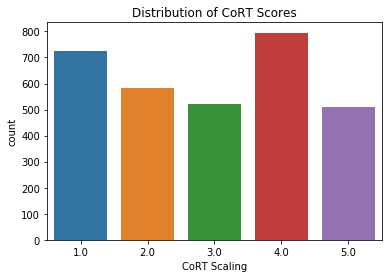

In [28]:
# Visualize distribution of responses overall
sns.countplot(x='Response', data=df_filtered)
plt.xlabel('CoRT Scaling')
plt.title('Distribution of CoRT Scores');

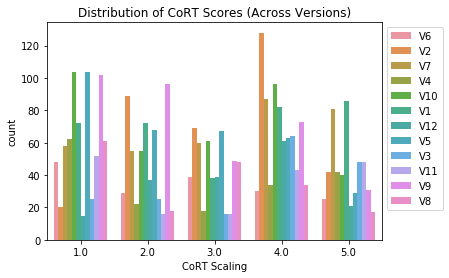

In [29]:
# Visualize distribution of responses per participant
ax = sns.countplot(x='Response', hue='counterbalance-mpke', data=df_filtered)
ax.legend(loc='best', bbox_to_anchor=(1,1))
plt.xlabel('CoRT Scaling')
plt.title('Distribution of CoRT Scores (Across Versions)');